--- INITIAL DATASET AUDIT ---
Total Records: 48895 | Attributes: 16
Duplicate Entries: 0

MISSING VALUES IDENTIFIED:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64
----------------------------------------

--- POST-CLEANING SUMMARY ---
Clean Records: 48410
Remaining Nulls: 0

KEY METRICS DISTRIBUTION:


,price,minimum_nights,number_of_reviews
count,48410.000000,48410.000000,48410.000000
mean,137.575170,6.979508,23.412663
std,103.780081,20.293249,44.700109
min,10.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000
50%,105.000000,3.000000,5.000000
75%,175.000000,5.000000,24.000000
max,799.000000,1250.000000,629.000000


/tmp/ipykernel_320/326201368.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['price'], palette="Set2")


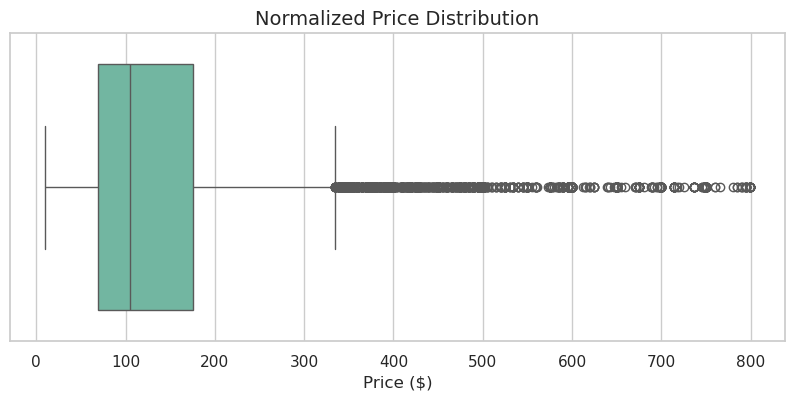


CLEANED DATASET PREVIEW:


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('AB_NYC_2019.csv')

# Defining Colors for Console Output
BLUE = '\033[94m\033[1m'
GREEN = '\033[92m\033[1m'
RED = '\033[91m\033[1m'
END = '\033[0m'

# --- DATA AUDIT ---
print(f"{BLUE}--- INITIAL DATASET AUDIT ---{END}")
print(f"Total Records: {df.shape[0]} | Attributes: {df.shape[1]}")
print(f"Duplicate Entries: {df.duplicated().sum()}")

print(f"\n{RED}MISSING VALUES IDENTIFIED:{END}")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("-" * 40)

# --- DATA CLEANING ---
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['name'] = df['name'].fillna("Unknown")
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

# Price filtering (Removing 0s and outliers)
df = df[df['price'] > 0]
price_cap = df['price'].quantile(0.99)
df = df[df['price'] <= price_cap]

# --- FINAL RESULTS ---
print(f"\n{GREEN}--- POST-CLEANING SUMMARY ---{END}")
print(f"Clean Records: {df.shape[0]}")
print(f"Remaining Nulls: {df.isnull().sum().sum()}")

# Statistical distribution (Formatted Table)
print(f"\n{BLUE}KEY METRICS DISTRIBUTION:{END}")
display(df[['price', 'minimum_nights', 'number_of_reviews']].describe())

# Visualizing results
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'], palette="Set2")
plt.title('Normalized Price Distribution', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.show()

# Final Data Preview
print(f"\n{BLUE}CLEANED DATASET PREVIEW:{END}")
display(df.head())

# Save final version
df.to_csv('Cleaned_Airbnb_Data.csv', index=False)